# Gaussian Process Demo with Hyperparameter Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import SGD
from tqdm.auto import tqdm
from gp import GP

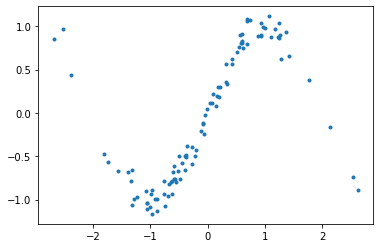

In [2]:
X = torch.randn(100,1)
f = torch.sin(X * 2 * np.pi /4).flatten()
y = f + torch.randn_like(f) * 0.1
y = y[:,None]
grid = torch.linspace(-5, 5, 200)[:,None]
plt.plot(X.flatten(), y.flatten(), '.')

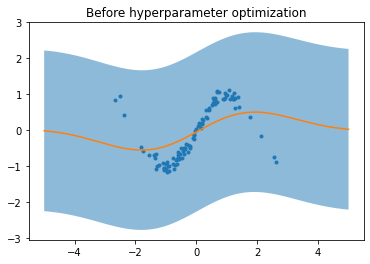

In [3]:
gp = GP(length_scale=4, amplitude_scale=0.1)
gp.fit(X, y)
mu, var = gp.forward(grid)
mu = mu.detach().numpy().flatten()
std = torch.sqrt(var).detach().numpy().flatten()
plt.plot(X.flatten(), y, '.')
plt.plot(grid.flatten(), mu)
plt.fill_between(grid.flatten(), y1=mu+std, y2=mu-std, alpha=0.3)
plt.title('Before hyperparameter optimization');

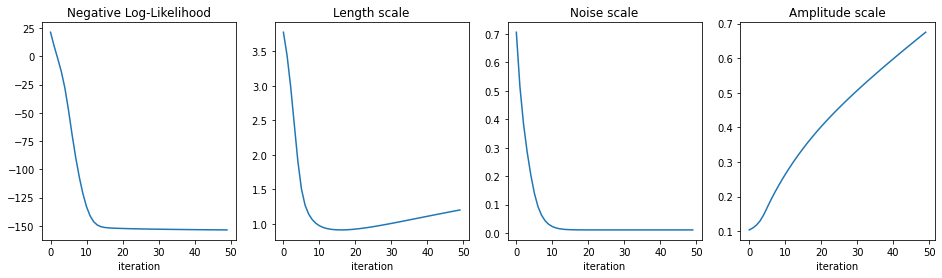

In [4]:
opt = SGD(gp.parameters(), lr=0.01)
l_loss = []; l_length = []; l_noise = []; l_amp = []
for i in tqdm(range(50)):
    d_train = gp.train_step(X, y, opt)
    l_loss.append(d_train['loss'])
    l_length.append(d_train['length'])
    l_noise.append(d_train['noise'])
    l_amp.append(d_train['amplitude'])
fig, axs = plt.subplots(ncols=4, figsize=(16,4))
axs[0].plot(l_loss); axs[0].set_title('Negative Log-Likelihood'); axs[0].set_xlabel('iteration')
axs[1].plot(torch.stack(l_length)); axs[1].set_title('Length scale'); axs[1].set_xlabel('iteration')
axs[2].plot(torch.stack(l_noise)); axs[2].set_title('Noise scale'); axs[2].set_xlabel('iteration')
axs[3].plot(torch.stack(l_amp)); axs[3].set_title('Amplitude scale'); axs[3].set_xlabel('iteration');

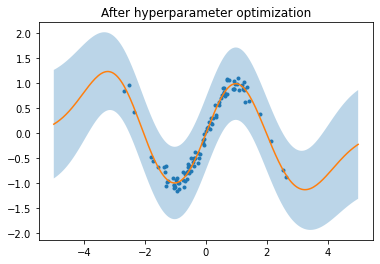

In [6]:
mu, var = gp.forward(grid)
mu = mu.detach().numpy().flatten()
std = torch.sqrt(var).detach().numpy().flatten()
plt.plot(X.flatten(), y, '.')
plt.plot(grid.flatten(), mu)
plt.fill_between(grid.flatten(), y1=mu+std, y2=mu-std, alpha=0.3)
plt.title('After hyperparameter optimization');